In [1]:
import pandas as pd
import imblearn
import seaborn as sns
import BayesLib as bl

from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from collections import Counter
from numpy import where
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC
#from imblearn.over_sampling import BorderlineSMOTE 
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
#abriendo el conjunto de datos desde un archivo CSV y asignandolo los datos al DataFrame "df"
df = pd.read_csv('dataset_a.csv', sep=';', error_bad_lines=False)

In [3]:
%%capture
#Eliminando variables que no aportan al análisis
df = df.drop([
    'rut', 'usuario', 'correo', 'nombre', 'profesor', 
    'i1', 'f1', 's1', 
    'i2', 'f2', 's2',
    'i3', 'f3', 's3', 
    'i4', 'f4', 's4', 
    'i5', 'f5', 's5', 
    'i6', 'f6', 's6',
    'sol1', 'sol2', 'sol3', 'sol4',
    'tarea1', 'tarea2',
    'controles', 'np', 'examen'], axis=1)

In [4]:
#Estadísticas de la variable "programa"
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

#Transformación numérica de la variable "programa"
for i in range(len(serie)):
    df["programa"] = df["programa"].str.replace(serie.index[i], str(i+1))
  
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

df['programa'] = df['programa'].astype('int')

BACHILLERATO EN CIENCIAS                    0.428266
INGENIERIA INDUSTRIAL                       6.638116
INGENIERIA CIVIL INFORMATICA               23.340471
INGENIERIA EN COMPUTACION E INFORMATICA    29.336188
INGENIERIA CIVIL INDUSTRIAL                40.256959
Name: programa, dtype: float64
1     0.428266
2     6.638116
3    23.340471
4    29.336188
5    40.256959
Name: programa, dtype: float64


In [5]:
#Estadísticas de la variable "estado"
serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

#Transformacíon numérica de la variable "estado"
for i in range(len(serie)):
    df["estado"] = df["estado"].str.replace(serie.index[i], str(i))

serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

df['estado'] = df['estado'].astype('int')

A    89.507495
R    10.492505
Name: estado, dtype: float64
0    89.507495
1    10.492505
Name: estado, dtype: float64


In [6]:
df = df.loc[:, ['lt', 'tt', 'pt', 'game_score', 
                'op1','op2', 'op3', 'op4', 'op5', 'op6',
                'sv1','sv2','sv3','sv4','sv5','sv6',
                'score', 'score_a', 'score_p', 'score_d', 'score_s',
                'programa', 'final', 'estado']]

In [7]:
binsNotas = 7
binsOtros = 5

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['lt']])
df[['lt']] = valor_discreto

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['tt']])
df[['tt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['pt']])
df[['pt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['game_score']])
df[['game_score']] = valor_discreto

nota_final =  KBinsDiscretizer(n_bins=binsNotas, encode='ordinal', strategy = "kmeans").fit_transform(df[['final']])
df[['final']] = valor_discreto

In [8]:
df.head()

lt   tt   pt  game_score  op1  op2  op3  op4  op5  op6  ...  sv5  sv6  \
0  0.0  2.0  2.0         2.0    0    1    1    1    1    1  ...    1    1   
1  0.0  1.0  1.0         1.0    1    0    1    1    0    0  ...    1    1   
2  0.0  1.0  1.0         1.0    1    1    0    1    0    1  ...    1    1   
3  1.0  0.0  0.0         0.0    1    0    0    1    0    0  ...    1    1   
4  0.0  2.0  2.0         2.0    1    1    1    1    1    1  ...    1    1   

   score  score_a  score_p  score_d  score_s  programa  final  estado  
0      9        6        4        3        3         4    2.0       1  
1      5        4        2        2        1         5    1.0       1  
2      8        5        4        2        2         2    1.0       1  
3      9        6        4        3        3         5    0.0       1  
4      6        4        3        2        3         4    2.0       1  

[5 rows x 24 columns]

INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  1
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


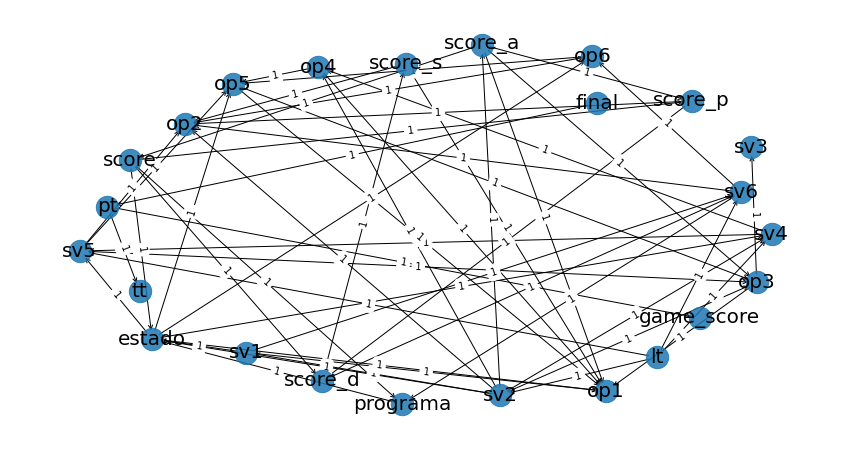

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of lt:
+-------------------------+------------+
| lt(0.0)                 | 0.23906    |
+-------------------------+------------+
| lt(0.03516815619394986) | 0.00704598 |
+-------------------------+------------+
| lt(0.0817375076356508)  | 0.00704598 |
+-------------------------+------------+
| lt(0.09540255717188673) | 0.00704598 |
+-------------------------+------------+
| lt(0.11141103894795124) | 0.00704598 |
+-------------------------+------------+
| lt(0.11576073858038372) | 0.00704598 |
+-------------------------+------------+
| lt(0.11816008586276161) | 0.00704598 |
+-------------------------+------------+
| lt(0.13065137524571524) | 0.00704598 |
+-------------------------+------------+
| lt(0.13209957957502294) | 0.00704598 |
+-------------------------+------------+
| lt(0.13223933176663372) | 0.00704598 |
+-------------------------+------------+
| lt(0.180859

+---------+------------+---------------------+------------+--------------------+------------+---------------------+------------+----------------------+------------+---------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+------------------

+---------------------------+-----------------------+---------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+------------------------+-------------------------+------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+------------------------+------------------------+-------------------------+-------------------------+------------------------+------------------------+-------------------------+------------------------+------------------------+-------------------------+-------------------------+------------------------+-------------------------+-------------------------+------------

+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------------+-------------+-------------+-------------+--------------------+----

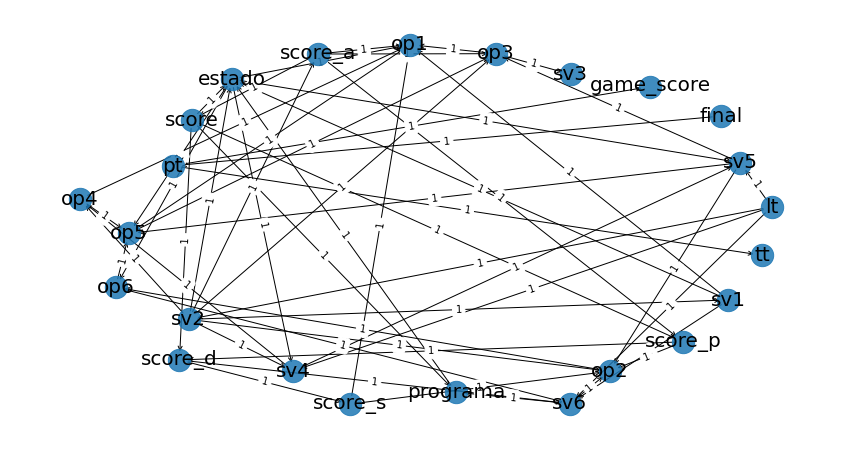

FILA N°: 0 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0651 |
+-----------+---------------+
| estado(1) |        0.9349 |
+-----------+---------------+
FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6129 |
+-----------+---------------+
| estado(1) |        0.3871 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2466 |
+-----------+---------------+
| estado(1) |        0.7534 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1123 |
+-----------+---------------+
| estado(1) |        0.8877 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0509 |
+-----------+---------------+
| estado(1) |        0.9491 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8864 |
+-----------+---------------+
| estado(1) |        0.1136 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6780 |
+-----------+---------------+
| estado(1) |        0.3220 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2494 |
+-----------+---------------+
| estado(1) |        0.7506 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1455 |
+-----------+---------------+
| estado(1) |        0.8545 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0565 |
+-----------+---------------+
| estado(1) |        0.9435 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2117 |
+-----------+---------------+
| estado(1) |        0.7883 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0206 |
+-----------+---------------+
| estado(1) |        0.9794 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0066 |
+-----------+---------------+
| estado(1) |        0.9934 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0218 |
+-----------+---------------+
| estado(1) |        0.9782 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1121 |
+-----------+---------------+
| estado(1) |        0.8879 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0268 |
+-----------+---------------+
| estado(1) |        0.9732 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6299 |
+-----------+---------------+
| estado(1) |        0.3701 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5128 |
+-----------+---------------+
| estado(1) |        0.4872 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3718 |
+-----------+---------------+
| estado(1) |        0.6282 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0218 |
+-----------+---------------+
| estado(1) |        0.9782 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0865 |
+-----------+---------------+
| estado(1) |        0.9135 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3015 |
+-----------+---------------+
| estado(1) |        0.6985 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1328 |
+-----------+---------------+
| estado(1) |        0.8672 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6026 |
+-----------+---------------+
| estado(1) |        0.3974 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1367 |
+-----------+---------------+
| estado(1) |        0.8633 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8002 |
+-----------+---------------+
| estado(1) |        0.1998 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0540 |
+-----------+---------------+
| estado(1) |        0.9460 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6314 |
+-----------+---------------+
| estado(1) |        0.3686 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6417 |
+-----------+---------------+
| estado(1) |        0.3583 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1723 |
+-----------+---------------+
| estado(1) |        0.8277 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6085 |
+-----------+---------------+
| estado(1) |        0.3915 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5461 |
+-----------+---------------+
| estado(1) |        0.4539 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6351 |
+-----------+---------------+
| estado(1) |        0.3649 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5848 |
+-----------+---------------+
| estado(1) |        0.4152 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0106 |
+-----------+---------------+
| estado(1) |        0.9894 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0057 |
+-----------+---------------+
| estado(1) |        0.9943 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5627 |
+-----------+---------------+
| estado(1) |        0.4373 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0924 |
+-----------+---------------+
| estado(1) |        0.9076 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5819 |
+-----------+---------------+
| estado(1) |        0.4181 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8292 |
+-----------+---------------+
| estado(1) |        0.1708 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8465 |
+-----------+---------------+
| estado(1) |        0.1535 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8422 |
+-----------+---------------+
| estado(1) |        0.1578 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4487 |
+-----------+---------------+
| estado(1) |        0.5513 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9626 |
+-----------+---------------+
| estado(1) |        0.0374 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3557 |
+-----------+---------------+
| estado(1) |        0.6443 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3806 |
+-----------+---------------+
| estado(1) |        0.6194 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9575 |
+-----------+---------------+
| estado(1) |        0.0425 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7532 |
+-----------+---------------+
| estado(1) |        0.2468 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9922 |
+-----------+---------------+
| estado(1) |        0.0078 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9382 |
+-----------+---------------+
| estado(1) |        0.0618 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9590 |
+-----------+---------------+
| estado(1) |        0.0410 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9943 |
+-----------+---------------+
| estado(1) |        0.0057 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8110 |
+-----------+---------------+
| estado(1) |        0.1890 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9183 |
+-----------+---------------+
| estado(1) |        0.0817 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8994 |
+-----------+---------------+
| estado(1) |        0.1006 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7905 |
+-----------+---------------+
| estado(1) |        0.2095 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1890 |
+-----------+---------------+
| estado(1) |        0.8110 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4510 |
+-----------+---------------+
| estado(1) |        0.5490 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7795 |
+-----------+---------------+
| estado(1) |        0.2205 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8889 |
+-----------+---------------+
| estado(1) |        0.1111 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9636 |
+-----------+---------------+
| estado(1) |        0.0364 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2240 |
+-----------+---------------+
| estado(1) |        0.7760 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9955 |
+-----------+---------------+
| estado(1) |        0.0045 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9696 |
+-----------+---------------+
| estado(1) |        0.0304 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7708 |
+-----------+---------------+
| estado(1) |        0.2292 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8789 |
+-----------+---------------+
| estado(1) |        0.1211 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9286 |
+-----------+---------------+
| estado(1) |        0.0714 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9127 |
+-----------+---------------+
| estado(1) |        0.0873 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5817 |
+-----------+---------------+
| estado(1) |        0.4183 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8608 |
+-----------+---------------+
| estado(1) |        0.1392 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4847 |
+-----------+---------------+
| estado(1) |        0.5153 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0829 |
+-----------+---------------+
| estado(1) |        0.9171 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9739 |
+-----------+---------------+
| estado(1) |        0.0261 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5580 |
+-----------+---------------+
| estado(1) |        0.4420 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9402 |
+-----------+---------------+
| estado(1) |        0.0598 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8321 |
+-----------+---------------+
| estado(1) |        0.1679 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9918 |
+-----------+---------------+
| estado(1) |        0.0082 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8420 |
+-----------+---------------+
| estado(1) |        0.1580 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9499 |
+-----------+---------------+
| estado(1) |        0.0501 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9926 |
+-----------+---------------+
| estado(1) |        0.0074 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9860 |
+-----------+---------------+
| estado(1) |        0.0140 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9402 |
+-----------+---------------+
| estado(1) |        0.0598 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9803 |
+-----------+---------------+
| estado(1) |        0.0197 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9396 |
+-----------+---------------+
| estado(1) |        0.0604 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6433 |
+-----------+---------------+
| estado(1) |        0.3567 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8056 |
+-----------+---------------+
| estado(1) |        0.1944 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8692 |
+-----------+---------------+
| estado(1) |        0.1308 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7742 |
+-----------+---------------+
| estado(1) |        0.2258 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9098 |
+-----------+---------------+
| estado(1) |        0.0902 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9668 |
+-----------+---------------+
| estado(1) |        0.0332 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9307 |
+-----------+---------------+
| estado(1) |        0.0693 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8508 |
+-----------+---------------+
| estado(1) |        0.1492 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7556 |
+-----------+---------------+
| estado(1) |        0.2444 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8424 |
+-----------+---------------+
| estado(1) |        0.1576 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9019 |
+-----------+---------------+
| estado(1) |        0.0981 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6232 |
+-----------+---------------+
| estado(1) |        0.3768 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9605 |
+-----------+---------------+
| estado(1) |        0.0395 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7474 |
+-----------+---------------+
| estado(1) |        0.2526 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9752 |
+-----------+---------------+
| estado(1) |        0.0248 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9518 |
+-----------+---------------+
| estado(1) |        0.0482 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1730 |
+-----------+---------------+
| estado(1) |        0.8270 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9802 |
+-----------+---------------+
| estado(1) |        0.0198 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9922 |
+-----------+---------------+
| estado(1) |        0.0078 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9740 |
+-----------+---------------+
| estado(1) |        0.0260 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6533 |
+-----------+---------------+
| estado(1) |        0.3467 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7057 |
+-----------+---------------+
| estado(1) |        0.2943 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8988 |
+-----------+---------------+
| estado(1) |        0.1012 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3294 |
+-----------+---------------+
| estado(1) |        0.6706 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9412 |
+-----------+---------------+
| estado(1) |        0.0588 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9362 |
+-----------+---------------+
| estado(1) |        0.0638 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4430 |
+-----------+---------------+
| estado(1) |        0.5570 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9504 |
+-----------+---------------+
| estado(1) |        0.0496 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8625 |
+-----------+---------------+
| estado(1) |        0.1375 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8776 |
+-----------+---------------+
| estado(1) |        0.1224 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6261 |
+-----------+---------------+
| estado(1) |        0.3739 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9738 |
+-----------+---------------+
| estado(1) |        0.0262 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8228 |
+-----------+---------------+
| estado(1) |        0.1772 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4906 |
+-----------+---------------+
| estado(1) |        0.5094 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":0, "sv6":1, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9391 |
+-----------+---------------+
| estado(1) |        0.0609 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9306 |
+-----------+---------------+
| estado(1) |        0.0694 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9531 |
+-----------+---------------+
| estado(1) |        0.0469 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9751 |
+-----------+---------------+
| estado(1) |        0.0249 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4749 |
+-----------+---------------+
| estado(1) |        0.5251 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9380 |
+-----------+---------------+
| estado(1) |        0.0620 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9969 |
+-----------+---------------+
| estado(1) |        0.0031 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9402 |
+-----------+---------------+
| estado(1) |        0.0598 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9285 |
+-----------+---------------+
| estado(1) |        0.0715 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9383 |
+-----------+---------------+
| estado(1) |        0.0617 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9307 |
+-----------+---------------+
| estado(1) |        0.0693 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9026 |
+-----------+---------------+
| estado(1) |        0.0974 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9956 |
+-----------+---------------+
| estado(1) |        0.0044 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8555 |
+-----------+---------------+
| estado(1) |        0.1445 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0859 |
+-----------+---------------+
| estado(1) |        0.9141 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7606 |
+-----------+---------------+
| estado(1) |        0.2394 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1413 |
+-----------+---------------+
| estado(1) |        0.8587 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4434 |
+-----------+---------------+
| estado(1) |        0.5566 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4467 |
+-----------+---------------+
| estado(1) |        0.5533 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4948 |
+-----------+---------------+
| estado(1) |        0.5052 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8671 |
+-----------+---------------+
| estado(1) |        0.1329 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8980 |
+-----------+---------------+
| estado(1) |        0.1020 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8281 |
+-----------+---------------+
| estado(1) |        0.1719 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4453 |
+-----------+---------------+
| estado(1) |        0.5547 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8572 |
+-----------+---------------+
| estado(1) |        0.1428 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9759 |
+-----------+---------------+
| estado(1) |        0.0241 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9695 |
+-----------+---------------+
| estado(1) |        0.0305 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9751 |
+-----------+---------------+
| estado(1) |        0.0249 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8763 |
+-----------+---------------+
| estado(1) |        0.1237 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9674 |
+-----------+---------------+
| estado(1) |        0.0326 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5150 |
+-----------+---------------+
| estado(1) |        0.4850 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9471 |
+-----------+---------------+
| estado(1) |        0.0529 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4234 |
+-----------+---------------+
| estado(1) |        0.5766 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6392 |
+-----------+---------------+
| estado(1) |        0.3608 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7884 |
+-----------+---------------+
| estado(1) |        0.2116 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9231 |
+-----------+---------------+
| estado(1) |        0.0769 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1367 |
+-----------+---------------+
| estado(1) |        0.8633 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8358 |
+-----------+---------------+
| estado(1) |        0.1642 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6488 |
+-----------+---------------+
| estado(1) |        0.3512 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9681 |
+-----------+---------------+
| estado(1) |        0.0319 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9513 |
+-----------+---------------+
| estado(1) |        0.0487 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7373 |
+-----------+---------------+
| estado(1) |        0.2627 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9544 |
+-----------+---------------+
| estado(1) |        0.0456 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9657 |
+-----------+---------------+
| estado(1) |        0.0343 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8450 |
+-----------+---------------+
| estado(1) |        0.1550 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5612 |
+-----------+---------------+
| estado(1) |        0.4388 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7018 |
+-----------+---------------+
| estado(1) |        0.2982 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9505 |
+-----------+---------------+
| estado(1) |        0.0495 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9696 |
+-----------+---------------+
| estado(1) |        0.0304 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9377 |
+-----------+---------------+
| estado(1) |        0.0623 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6793 |
+-----------+---------------+
| estado(1) |        0.3207 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8645 |
+-----------+---------------+
| estado(1) |        0.1355 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9991 |
+-----------+---------------+
| estado(1) |        0.0009 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9851 |
+-----------+---------------+
| estado(1) |        0.0149 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9723 |
+-----------+---------------+
| estado(1) |        0.0277 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3683 |
+-----------+---------------+
| estado(1) |        0.6317 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8249 |
+-----------+---------------+
| estado(1) |        0.1751 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8098 |
+-----------+---------------+
| estado(1) |        0.1902 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8566 |
+-----------+---------------+
| estado(1) |        0.1434 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9057 |
+-----------+---------------+
| estado(1) |        0.0943 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9087 |
+-----------+---------------+
| estado(1) |        0.0913 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5885 |
+-----------+---------------+
| estado(1) |        0.4115 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9207 |
+-----------+---------------+
| estado(1) |        0.0793 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8081 |
+-----------+---------------+
| estado(1) |        0.1919 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9402 |
+-----------+---------------+
| estado(1) |        0.0598 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6923 |
+-----------+---------------+
| estado(1) |        0.3077 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7364 |
+-----------+---------------+
| estado(1) |        0.2636 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7113 |
+-----------+---------------+
| estado(1) |        0.2887 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8984 |
+-----------+---------------+
| estado(1) |        0.1016 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9355 |
+-----------+---------------+
| estado(1) |        0.0645 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9493 |
+-----------+---------------+
| estado(1) |        0.0507 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9741 |
+-----------+---------------+
| estado(1) |        0.0259 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9906 |
+-----------+---------------+
| estado(1) |        0.0094 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5972 |
+-----------+---------------+
| estado(1) |        0.4028 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9662 |
+-----------+---------------+
| estado(1) |        0.0338 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5518 |
+-----------+---------------+
| estado(1) |        0.4482 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8087 |
+-----------+---------------+
| estado(1) |        0.1913 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5261 |
+-----------+---------------+
| estado(1) |        0.4739 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7658 |
+-----------+---------------+
| estado(1) |        0.2342 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9578 |
+-----------+---------------+
| estado(1) |        0.0422 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9506 |
+-----------+---------------+
| estado(1) |        0.0494 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9900 |
+-----------+---------------+
| estado(1) |        0.0100 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6948 |
+-----------+---------------+
| estado(1) |        0.3052 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8613 |
+-----------+---------------+
| estado(1) |        0.1387 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9456 |
+-----------+---------------+
| estado(1) |        0.0544 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9412 |
+-----------+---------------+
| estado(1) |        0.0588 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9650 |
+-----------+---------------+
| estado(1) |        0.0350 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9788 |
+-----------+---------------+
| estado(1) |        0.0212 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9117 |
+-----------+---------------+
| estado(1) |        0.0883 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4729 |
+-----------+---------------+
| estado(1) |        0.5271 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9743 |
+-----------+---------------+
| estado(1) |        0.0257 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9969 |
+-----------+---------------+
| estado(1) |        0.0031 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7301 |
+-----------+---------------+
| estado(1) |        0.2699 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9351 |
+-----------+---------------+
| estado(1) |        0.0649 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1702 |
+-----------+---------------+
| estado(1) |        0.8298 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3909 |
+-----------+---------------+
| estado(1) |        0.6091 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9289 |
+-----------+---------------+
| estado(1) |        0.0711 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8228 |
+-----------+---------------+
| estado(1) |        0.1772 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8246 |
+-----------+---------------+
| estado(1) |        0.1754 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9446 |
+-----------+---------------+
| estado(1) |        0.0554 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9138 |
+-----------+---------------+
| estado(1) |        0.0862 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9969 |
+-----------+---------------+
| estado(1) |        0.0031 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9788 |
+-----------+---------------+
| estado(1) |        0.0212 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0917 |
+-----------+---------------+
| estado(1) |        0.9083 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9700 |
+-----------+---------------+
| estado(1) |        0.0300 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8636 |
+-----------+---------------+
| estado(1) |        0.1364 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8714 |
+-----------+---------------+
| estado(1) |        0.1286 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8626 |
+-----------+---------------+
| estado(1) |        0.1374 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9967 |
+-----------+---------------+
| estado(1) |        0.0033 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2221 |
+-----------+---------------+
| estado(1) |        0.7779 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8522 |
+-----------+---------------+
| estado(1) |        0.1478 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7136 |
+-----------+---------------+
| estado(1) |        0.2864 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9769 |
+-----------+---------------+
| estado(1) |        0.0231 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8956 |
+-----------+---------------+
| estado(1) |        0.1044 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8593 |
+-----------+---------------+
| estado(1) |        0.1407 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6192 |
+-----------+---------------+
| estado(1) |        0.3808 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9486 |
+-----------+---------------+
| estado(1) |        0.0514 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8830 |
+-----------+---------------+
| estado(1) |        0.1170 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8725 |
+-----------+---------------+
| estado(1) |        0.1275 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4453 |
+-----------+---------------+
| estado(1) |        0.5547 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9977 |
+-----------+---------------+
| estado(1) |        0.0023 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8824 |
+-----------+---------------+
| estado(1) |        0.1176 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9903 |
+-----------+---------------+
| estado(1) |        0.0097 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9814 |
+-----------+---------------+
| estado(1) |        0.0186 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9821 |
+-----------+---------------+
| estado(1) |        0.0179 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9549 |
+-----------+---------------+
| estado(1) |        0.0451 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7989 |
+-----------+---------------+
| estado(1) |        0.2011 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8307 |
+-----------+---------------+
| estado(1) |        0.1693 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9971 |
+-----------+---------------+
| estado(1) |        0.0029 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9820 |
+-----------+---------------+
| estado(1) |        0.0180 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9009 |
+-----------+---------------+
| estado(1) |        0.0991 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9490 |
+-----------+---------------+
| estado(1) |        0.0510 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6363 |
+-----------+---------------+
| estado(1) |        0.3637 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9966 |
+-----------+---------------+
| estado(1) |        0.0034 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9393 |
+-----------+---------------+
| estado(1) |        0.0607 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7684 |
+-----------+---------------+
| estado(1) |        0.2316 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9820 |
+-----------+---------------+
| estado(1) |        0.0180 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9304 |
+-----------+---------------+
| estado(1) |        0.0696 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7984 |
+-----------+---------------+
| estado(1) |        0.2016 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8597 |
+-----------+---------------+
| estado(1) |        0.1403 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9578 |
+-----------+---------------+
| estado(1) |        0.0422 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7365 |
+-----------+---------------+
| estado(1) |        0.2635 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1403 |
+-----------+---------------+
| estado(1) |        0.8597 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6392 |
+-----------+---------------+
| estado(1) |        0.3608 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8227 |
+-----------+---------------+
| estado(1) |        0.1773 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9749 |
+-----------+---------------+
| estado(1) |        0.0251 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8442 |
+-----------+---------------+
| estado(1) |        0.1558 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9001 |
+-----------+---------------+
| estado(1) |        0.0999 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3088 |
+-----------+---------------+
| estado(1) |        0.6912 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9768 |
+-----------+---------------+
| estado(1) |        0.0232 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9403 |
+-----------+---------------+
| estado(1) |        0.0597 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8101 |
+-----------+---------------+
| estado(1) |        0.1899 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8508 |
+-----------+---------------+
| estado(1) |        0.1492 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8146 |
+-----------+---------------+
| estado(1) |        0.1854 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8970 |
+-----------+---------------+
| estado(1) |        0.1030 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9113 |
+-----------+---------------+
| estado(1) |        0.0887 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8309 |
+-----------+---------------+
| estado(1) |        0.1691 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4150 |
+-----------+---------------+
| estado(1) |        0.5850 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7556 |
+-----------+---------------+
| estado(1) |        0.2444 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9997 |
+-----------+---------------+
| estado(1) |        0.0003 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9558 |
+-----------+---------------+
| estado(1) |        0.0442 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9812 |
+-----------+---------------+
| estado(1) |        0.0188 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8869 |
+-----------+---------------+
| estado(1) |        0.1131 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8497 |
+-----------+---------------+
| estado(1) |        0.1503 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7213 |
+-----------+---------------+
| estado(1) |        0.2787 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9728 |
+-----------+---------------+
| estado(1) |        0.0272 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8001 |
+-----------+---------------+
| estado(1) |        0.1999 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6493 |
+-----------+---------------+
| estado(1) |        0.3507 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9298 |
+-----------+---------------+
| estado(1) |        0.0702 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6479 |
+-----------+---------------+
| estado(1) |        0.3521 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5318 |
+-----------+---------------+
| estado(1) |        0.4682 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9827 |
+-----------+---------------+
| estado(1) |        0.0173 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9946 |
+-----------+---------------+
| estado(1) |        0.0054 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6357 |
+-----------+---------------+
| estado(1) |        0.3643 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9397 |
+-----------+---------------+
| estado(1) |        0.0603 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8384 |
+-----------+---------------+
| estado(1) |        0.1616 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6803 |
+-----------+---------------+
| estado(1) |        0.3197 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9672 |
+-----------+---------------+
| estado(1) |        0.0328 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9389 |
+-----------+---------------+
| estado(1) |        0.0611 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2401 |
+-----------+---------------+
| estado(1) |        0.7599 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4785 |
+-----------+---------------+
| estado(1) |        0.5215 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7920 |
+-----------+---------------+
| estado(1) |        0.2080 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9526 |
+-----------+---------------+
| estado(1) |        0.0474 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9688 |
+-----------+---------------+
| estado(1) |        0.0312 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1332 |
+-----------+---------------+
| estado(1) |        0.8668 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9866 |
+-----------+---------------+
| estado(1) |        0.0134 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7015 |
+-----------+---------------+
| estado(1) |        0.2985 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9457 |
+-----------+---------------+
| estado(1) |        0.0543 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9330 |
+-----------+---------------+
| estado(1) |        0.0670 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9454 |
+-----------+---------------+
| estado(1) |        0.0546 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7826 |
+-----------+---------------+
| estado(1) |        0.2174 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5124 |
+-----------+---------------+
| estado(1) |        0.4876 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9056 |
+-----------+---------------+
| estado(1) |        0.0944 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7468 |
+-----------+---------------+
| estado(1) |        0.2532 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8378 |
+-----------+---------------+
| estado(1) |        0.1622 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9070 |
+-----------+---------------+
| estado(1) |        0.0930 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2941 |
+-----------+---------------+
| estado(1) |        0.7059 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9923 |
+-----------+---------------+
| estado(1) |        0.0077 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1046 |
+-----------+---------------+
| estado(1) |        0.8954 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9830 |
+-----------+---------------+
| estado(1) |        0.0170 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9045 |
+-----------+---------------+
| estado(1) |        0.0955 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8741 |
+-----------+---------------+
| estado(1) |        0.1259 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9053 |
+-----------+---------------+
| estado(1) |        0.0947 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7860 |
+-----------+---------------+
| estado(1) |        0.2140 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4174 |
+-----------+---------------+
| estado(1) |        0.5826 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9356 |
+-----------+---------------+
| estado(1) |        0.0644 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9732 |
+-----------+---------------+
| estado(1) |        0.0268 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6499 |
+-----------+---------------+
| estado(1) |        0.3501 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9779 |
+-----------+---------------+
| estado(1) |        0.0221 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9098 |
+-----------+---------------+
| estado(1) |        0.0902 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9280 |
+-----------+---------------+
| estado(1) |        0.0720 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5852 |
+-----------+---------------+
| estado(1) |        0.4148 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8595 |
+-----------+---------------+
| estado(1) |        0.1405 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9860 |
+-----------+---------------+
| estado(1) |        0.0140 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5707 |
+-----------+---------------+
| estado(1) |        0.4293 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9183 |
+-----------+---------------+
| estado(1) |        0.0817 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8802 |
+-----------+---------------+
| estado(1) |        0.1198 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5791 |
+-----------+---------------+
| estado(1) |        0.4209 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9468 |
+-----------+---------------+
| estado(1) |        0.0532 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9088 |
+-----------+---------------+
| estado(1) |        0.0912 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9330 |
+-----------+---------------+
| estado(1) |        0.0670 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9192 |
+-----------+---------------+
| estado(1) |        0.0808 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8552 |
+-----------+---------------+
| estado(1) |        0.1448 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2531 |
+-----------+---------------+
| estado(1) |        0.7469 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6015 |
+-----------+---------------+
| estado(1) |        0.3985 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9248 |
+-----------+---------------+
| estado(1) |        0.0752 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9448 |
+-----------+---------------+
| estado(1) |        0.0552 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8623 |
+-----------+---------------+
| estado(1) |        0.1377 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9979 |
+-----------+---------------+
| estado(1) |        0.0021 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1947 |
+-----------+---------------+
| estado(1) |        0.8053 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9900 |
+-----------+---------------+
| estado(1) |        0.0100 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7979 |
+-----------+---------------+
| estado(1) |        0.2021 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5190 |
+-----------+---------------+
| estado(1) |        0.4810 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9646 |
+-----------+---------------+
| estado(1) |        0.0354 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9378 |
+-----------+---------------+
| estado(1) |        0.0622 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7994 |
+-----------+---------------+
| estado(1) |        0.2006 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9989 |
+-----------+---------------+
| estado(1) |        0.0011 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9402 |
+-----------+---------------+
| estado(1) |        0.0598 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6269 |
+-----------+---------------+
| estado(1) |        0.3731 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9270 |
+-----------+---------------+
| estado(1) |        0.0730 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9446 |
+-----------+---------------+
| estado(1) |        0.0554 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9956 |
+-----------+---------------+
| estado(1) |        0.0044 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8330 |
+-----------+---------------+
| estado(1) |        0.1670 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9801 |
+-----------+---------------+
| estado(1) |        0.0199 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8800 |
+-----------+---------------+
| estado(1) |        0.1200 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9070 |
+-----------+---------------+
| estado(1) |        0.0930 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7188 |
+-----------+---------------+
| estado(1) |        0.2812 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8624 |
+-----------+---------------+
| estado(1) |        0.1376 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6387 |
+-----------+---------------+
| estado(1) |        0.3613 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9820 |
+-----------+---------------+
| estado(1) |        0.0180 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9197 |
+-----------+---------------+
| estado(1) |        0.0803 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9731 |
+-----------+---------------+
| estado(1) |        0.0269 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":1.384118428864037, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0646 |
+-----------+---------------+
| estado(1) |        0.9354 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.836774332195809, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1828 |
+-----------+---------------+
| estado(1) |        0.8172 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":0.0, "tt":1.4465153919039806, "pt":1.4465153919039806, "game_score":1.4465153919039806, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.4465153919039806}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0219 |
+-----------+---------------+
| estado(1) |        0.9781 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":2.0, "tt":0.2587744777140153, "pt":0.2587744777140153, "game_score":0.2587744777140153, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.2587744777140153}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0050 |
+-----------+---------------+
| estado(1) |        0.9950 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":0.0, "tt":0.593802543281103, "pt":0.593802543281103, "game_score":0.593802543281103, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.593802543281103}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":1.9209098114032988, "tt":1.9209098114032988, "pt":1.9209098114032988, "game_score":1.9209098114032988, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.9209098114032988}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0592 |
+-----------+---------------+
| estado(1) |        0.9408 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":2.0, "tt":0.29337047329665256, "pt":0.29337047329665256, "game_score":0.29337047329665256, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0050 |
+-----------+---------------+
| estado(1) |        0.9950 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":1.4010749687203594, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":1.0, "tt":0.7276727040836647, "pt":0.7276727040836647, "game_score":0.7276727040836647, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.7276727040836647}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1083 |
+-----------+---------------+
| estado(1) |        0.8917 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4603 |
+-----------+---------------+
| estado(1) |        0.5397 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "tt":0.5861674793950085, "pt":0.5861674793950085, "game_score":0.5861674793950085, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.5861674793950085}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0182 |
+-----------+---------------+
| estado(1) |        0.9818 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "tt":0.7954088781124432, "pt":0.7954088781124432, "game_score":0.7954088781124432, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.7954088781124432}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1183 |
+-----------+---------------+
| estado(1) |        0.8817 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "tt":1.602941938715691, "pt":1.602941938715691, "game_score":1.602941938715691, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.602941938715691}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1465 |
+-----------+---------------+
| estado(1) |        0.8535 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":1.2643359342331157, "tt":0.36783203288344213, "pt":0.36783203288344213, "game_score":0.36783203288344213, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.36783203288344213}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0248 |
+-----------+---------------+
| estado(1) |        0.9752 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4239 |
+-----------+---------------+
| estado(1) |        0.5761 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4211 |
+-----------+---------------+
| estado(1) |        0.5789 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":0.7342522576540607, "tt":1.3671261288270302, "pt":1.3671261288270302, "game_score":1.3671261288270302, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":3, "final":1.3671261288270302}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0172 |
+-----------+---------------+
| estado(1) |        0.9828 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":0.0, "tt":0.24941753421157897, "pt":0.24941753421157897, "game_score":0.24941753421157897, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.24941753421157897}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0540 |
+-----------+---------------+
| estado(1) |        0.9460 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4429 |
+-----------+---------------+
| estado(1) |        0.5571 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.29254508994875006, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2925 |
+-----------+---------------+
| estado(1) |        0.7075 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":3, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0476 |
+-----------+---------------+
| estado(1) |        0.9524 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1536 |
+-----------+---------------+
| estado(1) |        0.8464 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":1.0273272519814136, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":0.7063535564367847, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0456 |
+-----------+---------------+
| estado(1) |        0.9544 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.4619147761112178, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.4872006543061378, "tt":1.243600327153069, "pt":1.243600327153069, "game_score":1.243600327153069, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.243600327153069}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0964 |
+-----------+---------------+
| estado(1) |        0.9036 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":1.3180270347096992, "tt":1.6819729652903008, "pt":1.6819729652903008, "game_score":1.6819729652903008, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.6819729652903008}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0313 |
+-----------+---------------+
| estado(1) |        0.9687 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":0.0, "tt":0.3433973214171103, "pt":0.3433973214171103, "game_score":0.3433973214171103, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":0.3433973214171103}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0253 |
+-----------+---------------+
| estado(1) |        0.9747 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1205 |
+-----------+---------------+
| estado(1) |        0.8795 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1000 |
+-----------+---------------+
| estado(1) |        0.9000 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "tt":0.8329775227768141, "pt":0.8329775227768141, "game_score":0.8329775227768141, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.8329775227768141}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2117 |
+-----------+---------------+
| estado(1) |        0.7883 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1390 |
+-----------+---------------+
| estado(1) |        0.8610 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "tt":0.15594921607120238, "pt":0.15594921607120238, "game_score":0.15594921607120238, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":2, "final":0.15594921607120238}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.09540255717188673, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "tt":1.519699569428161, "pt":1.519699569428161, "game_score":1.519699569428161, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.519699569428161}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "tt":0.1492347182931777, "pt":0.1492347182931777, "game_score":0.1492347182931777, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":2, "final":0.1492347182931777}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1300 |
+-----------+---------------+
| estado(1) |        0.8700 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":1.3928317138337845, "tt":1.3928317138337845, "pt":1.3928317138337845, "game_score":1.3928317138337845, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.3928317138337845}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0592 |
+-----------+---------------+
| estado(1) |        0.9408 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":0.0, "tt":1.6234934334769453, "pt":1.6234934334769453, "game_score":1.6234934334769453, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.6234934334769453}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0219 |
+-----------+---------------+
| estado(1) |        0.9781 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2743 |
+-----------+---------------+
| estado(1) |        0.7257 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1332 |
+-----------+---------------+
| estado(1) |        0.8668 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1152 |
+-----------+---------------+
| estado(1) |        0.8848 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0093 |
+-----------+---------------+
| estado(1) |        0.9907 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0073 |
+-----------+---------------+
| estado(1) |        0.9927 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":0.021950259624139434, "pt":0.021950259624139434, "game_score":0.021950259624139434, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.021950259624139434}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1260 |
+-----------+---------------+
| estado(1) |        0.8740 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":0.009257659530150342, "pt":0.009257659530150342, "game_score":0.009257659530150342, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1183 |
+-----------+---------------+
| estado(1) |        0.8817 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":0.0, "tt":1.6642916096312836, "pt":1.6642916096312836, "game_score":1.6642916096312836, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":1.6642916096312836}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1890 |
+-----------+---------------+
| estado(1) |        0.8110 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":0.0, "tt":0.0033093850986957163, "pt":0.0033093850986957163, "game_score":0.0033093850986957163, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.0033093850986957163}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0540 |
+-----------+---------------+
| estado(1) |        0.9460 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":0.0, "tt":0.942714937756991, "pt":0.942714937756991, "game_score":0.942714937756991, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.942714937756991}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0540 |
+-----------+---------------+
| estado(1) |        0.9460 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1205 |
+-----------+---------------+
| estado(1) |        0.8795 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.13209957957502294, "tt":1.1320995795750228, "pt":1.1320995795750228, "game_score":1.1320995795750228, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":1.1320995795750228}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0392 |
+-----------+---------------+
| estado(1) |        0.9608 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":0.7122124716379137, "pt":0.7122124716379137, "game_score":0.7122124716379137, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.7122124716379137}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":1.5297526754844073, "tt":0.4702473245155926, "pt":0.4702473245155926, "game_score":0.4702473245155926, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":0.4702473245155926}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1913 |
+-----------+---------------+
| estado(1) |        0.8087 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6572 |
+-----------+---------------+
| estado(1) |        0.3428 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":1.0, "tt":0.1368530233641948, "pt":0.1368530233641948, "game_score":0.1368530233641948, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.1368530233641948}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0702 |
+-----------+---------------+
| estado(1) |        0.9298 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.21763954221403192, "tt":0.21763954221403192, "pt":0.21763954221403192, "game_score":0.21763954221403192, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":0, "programa":3, "final":0.21763954221403192}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0992 |
+-----------+---------------+
| estado(1) |        0.9008 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0371 |
+-----------+---------------+
| estado(1) |        0.9629 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":0.0, "tt":0.42108786046510205, "pt":0.42108786046510205, "game_score":0.42108786046510205, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p"

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0928 |
+-----------+---------------+
| estado(1) |        0.9072 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "tt":0.20801570868188768, "pt":0.20801570868188768, "game_score":0.20801570868188768, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":2, "final":0.20801570868188768}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":0.02759262365320836, "pt":0.02759262365320836, "game_score":0.02759262365320836, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.02759262365320836}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "tt":0.4935801413679882, "pt":0.4935801413679882, "game_score":0.4935801413679882, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.4935801413679882}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1367 |
+-----------+---------------+
| estado(1) |        0.8633 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":1.1605864515549378, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0646 |
+-----------+---------------+
| estado(1) |        0.9354 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0385 |
+-----------+---------------+
| estado(1) |        0.9615 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0734 |
+-----------+---------------+
| estado(1) |        0.9266 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":1.3038033171785388, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0646 |
+-----------+---------------+
| estado(1) |        0.9354 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "tt":0.8439920662777701, "pt":0.8439920662777701, "game_score":0.8439920662777701, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.8439920662777701}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.0, "tt":0.6293154516430689, "pt":0.6293154516430689, "game_score":0.6293154516430689, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.6293154516430689}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":1.6539261133158267, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0248 |
+-----------+---------------+
| estado(1) |        0.9752 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":1.1254537035673953, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0219 |
+-----------+---------------+
| estado(1) |        0.9781 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":0.0, "tt":2.326348471999549, "pt":2.326348471999549, "game_score":2.326348471999549, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final":2.326348471999549}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0218 |
+-----------+---------------+
| estado(1) |        0.9782 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2356 |
+-----------+---------------+
| estado(1) |        0.7644 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "tt":1.8836999106856531, "pt":1.8836999106856531, "game_score":1.8836999106856531, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.8836999106856531}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":2.0, "tt":0.3611735573717092, "pt":0.3611735573717092, "game_score":0.3611735573717092, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.3611735573717092}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0050 |
+-----------+---------------+
| estado(1) |        0.9950 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.48239638210972446, "tt":1.4823963821097244, "pt":1.4823963821097244, "game_score":1.4823963821097244, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.4823963821097244}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0113 |
+-----------+---------------+
| estado(1) |        0.9887 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.8616482308978856, "tt":0.8616482308978856, "pt":0.8616482308978856, "game_score":0.8616482308978856, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.8616482308978856}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0982 |
+-----------+---------------+
| estado(1) |        0.9018 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.7944495854189069, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0456 |
+-----------+---------------+
| estado(1) |        0.9544 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":1.910228047670743, "tt":1.089771952329257, "pt":1.089771952329257, "game_score":1.089771952329257, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.089771952329257}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0230 |
+-----------+---------------+
| estado(1) |        0.9770 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":1.2532982330966969, "tt":1.2532982330966969, "pt":1.2532982330966969, "game_score":1.2532982330966969, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.2532982330966969}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0592 |
+-----------+---------------+
| estado(1) |        0.9408 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":1.744770420314111, "pt":1.744770420314111, "game_score":1.744770420314111, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.744770420314111}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5621 |
+-----------+---------------+
| estado(1) |        0.4379 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":0.9041493803669138, "tt":0.09585061963308616, "pt":0.09585061963308616, "game_score":0.09585061963308616, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3504 |
+-----------+---------------+
| estado(1) |        0.6496 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":0.0, "tt":0.702607904540157, "pt":0.702607904540157, "game_score":0.702607904540157, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":0.702607904540157}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0172 |
+-----------+---------------+
| estado(1) |        0.9828 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0057 |
+-----------+---------------+
| estado(1) |        0.9943 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0093 |
+-----------+---------------+
| estado(1) |        0.9907 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"lt":1.145990546728736, "tt":0.8540094532712642, "pt":0.8540094532712642, "game_score":0.8540094532712642, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":0.8540094532712642}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1913 |
+-----------+---------------+
| estado(1) |        0.8087 |
+-----------+---------------+
FILA N°: 468 -> P("Estado" | [{"lt":0.0, "tt":0.2965236278305543, "pt":0.2965236278305543, "game_score":0.2965236278305543, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.2965236278305543}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0928 |
+-----------+---------------+
| estado(1) |        0.9072 |
+-----------+---------------+
FILA N°: 469 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4419 |
+-----------+---------------+
| estado(1) |        0.5581 |
+-----------+---------------+
FILA N°: 470 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 471 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4429 |
+-----------+---------------+
| estado(1) |        0.5571 |
+-----------+---------------+
FILA N°: 472 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0385 |
+-----------+---------------+
| estado(1) |        0.9615 |
+-----------+---------------+
FILA N°: 473 -> P("Estado" | [{"lt":0.8956476154212882, "tt":1.8956476154212882, "pt":1.8956476154212882, "game_score":1.8956476154212882, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.8956476154212882}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0113 |
+-----------+---------------+
| estado(1) |        0.9887 |
+-----------+---------------+
FILA N°: 474 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 475 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 476 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6690 |
+-----------+---------------+
| estado(1) |        0.3310 |
+-----------+---------------+
FILA N°: 477 -> P("Estado" | [{"lt":0.0, "tt":0.9687000019956044, "pt":0.9687000019956044, "game_score":0.9687000019956044, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.9687000019956044}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1367 |
+-----------+---------------+
| estado(1) |        0.8633 |
+-----------+---------------+
FILA N°: 478 -> P("Estado" | [{"lt":0.0, "tt":0.6395283488759635, "pt":0.6395283488759635, "game_score":0.6395283488759635, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.6395283488759635}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 479 -> P("Estado" | [{"lt":0.0, "tt":1.9975805686835586, "pt":1.9975805686835586, "game_score":1.9975805686835586, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.9975805686835586}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5621 |
+-----------+---------------+
| estado(1) |        0.4379 |
+-----------+---------------+
FILA N°: 480 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0172 |
+-----------+---------------+
| estado(1) |        0.9828 |
+-----------+---------------+
FILA N°: 481 -> P("Estado" | [{"lt":0.03516815619394986, "tt":0.03516815619394986, "pt":0.03516815619394986, "game_score":0.03516815619394986, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.03516815619394986}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0548 |
+-----------+---------------+
| estado(1) |        0.9452 |
+-----------+---------------+
FILA N°: 482 -> P("Estado" | [{"lt":0.0, "tt":0.948161170649552, "pt":0.948161170649552, "game_score":0.948161170649552, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.948161170649552}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1094 |
+-----------+---------------+
| estado(1) |        0.8906 |
+-----------+---------------+
FILA N°: 483 -> P("Estado" | [{"lt":0.8082772105131838, "tt":0.8082772105131838, "pt":0.8082772105131838, "game_score":0.8082772105131838, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.8082772105131838}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0548 |
+-----------+---------------+
| estado(1) |        0.9452 |
+-----------+---------------+
FILA N°: 484 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0431 |
+-----------+---------------+
| estado(1) |        0.9569 |
+-----------+---------------+
FILA N°: 485 -> P("Estado" | [{"lt":0.0, "tt":0.7832907657900012, "pt":0.7832907657900012, "game_score":0.7832907657900012, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":0.7832907657900012}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 486 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0635 |
+-----------+---------------+
| estado(1) |        0.9365 |
+-----------+---------------+
FILA N°: 487 -> P("Estado" | [{"lt":0.0, "tt":2.331645917275121, "pt":2.331645917275121, "game_score":2.331645917275121, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.331645917275121}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3152 |
+-----------+---------------+
| estado(1) |        0.6848 |
+-----------+---------------+
FILA N°: 488 -> P("Estado" | [{"lt":0.11576073858038372, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 489 -> P("Estado" | [{"lt":0.8785946710403348, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0585 |
+-----------+---------------+
| estado(1) |        0.9415 |
+-----------+---------------+
FILA N°: 490 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1328 |
+-----------+---------------+
| estado(1) |        0.8672 |
+-----------+---------------+
FILA N°: 491 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1723 |
+-----------+---------------+
| estado(1) |        0.8277 |
+-----------+---------------+
FILA N°: 492 -> P("Estado" | [{"lt":0.18250766015798514, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2135 |
+-----------+---------------+
| estado(1) |        0.7865 |
+-----------+---------------+
FILA N°: 493 -> P("Estado" | [{"lt":0.18085962309073877, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 494 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1152 |
+-----------+---------------+
| estado(1) |        0.8848 |
+-----------+---------------+
FILA N°: 495 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 496 -> P("Estado" | [{"lt":1.9870734830128238, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 497 -> P("Estado" | [{"lt":0.7590785788025842, "tt":0.24092142119741577, "pt":0.24092142119741577, "game_score":0.24092142119741577, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.24092142119741577}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3504 |
+-----------+---------------+
| estado(1) |        0.6496 |
+-----------+---------------+
FILA N°: 498 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4239 |
+-----------+---------------+
| estado(1) |        0.5761 |
+-----------+---------------+
FILA N°: 499 -> P("Estado" | [{"lt":0.0, "tt":0.8712134036929094, "pt":0.8712134036929094, "game_score":0.8712134036929094, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":0.8712134036929094}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0668 |
+-----------+---------------+
| estado(1) |        0.9332 |
+-----------+---------------+
FILA N°: 500 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1536 |
+-----------+---------------+
| estado(1) |        0.8464 |
+-----------+---------------+
FILA N°: 501 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6824 |
+-----------+---------------+
| estado(1) |        0.3176 |
+-----------+---------------+
FILA N°: 502 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0268 |
+-----------+---------------+
| estado(1) |        0.9732 |
+-----------+---------------+
FILA N°: 503 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5473 |
+-----------+---------------+
| estado(1) |        0.4527 |
+-----------+---------------+
FILA N°: 504 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0635 |
+-----------+---------------+
| estado(1) |        0.9365 |
+-----------+---------------+
FILA N°: 505 -> P("Estado" | [{"lt":0.0, "tt":0.35057643451877474, "pt":0.35057643451877474, "game_score":0.35057643451877474, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":0.35057643451877474}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0253 |
+-----------+---------------+
| estado(1) |        0.9747 |
+-----------+---------------+
FILA N°: 506 -> P("Estado" | [{"lt":0.9062956702924161, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0679 |
+-----------+---------------+
| estado(1) |        0.9321 |
+-----------+---------------+
FILA N°: 507 -> P("Estado" | [{"lt":1.8247249477902379, "tt":1.8247249477902379, "pt":1.8247249477902379, "game_score":1.8247249477902379, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.8247249477902379}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0592 |
+-----------+---------------+
| estado(1) |        0.9408 |
+-----------+---------------+
FILA N°: 508 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1000 |
+-----------+---------------+
| estado(1) |        0.9000 |
+-----------+---------------+
FILA N°: 509 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0431 |
+-----------+---------------+
| estado(1) |        0.9569 |
+-----------+---------------+
FILA N°: 510 -> P("Estado" | [{"lt":0.5035354481516592, "tt":0.5035354481516592, "pt":0.5035354481516592, "game_score":0.5035354481516592, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.5035354481516592}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0982 |
+-----------+---------------+
| estado(1) |        0.9018 |
+-----------+---------------+
FILA N°: 511 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0057 |
+-----------+---------------+
| estado(1) |        0.9943 |
+-----------+---------------+
FILA N°: 512 -> P("Estado" | [{"lt":0.0, "tt":0.08920344971246907, "pt":0.08920344971246907, "game_score":0.08920344971246907, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.08920344971246907}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0182 |
+-----------+---------------+
| estado(1) |        0.9818 |
+-----------+---------------+
FILA N°: 513 -> P("Estado" | [{"lt":0.9050130960339101, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0456 |
+-----------+---------------+
| estado(1) |        0.9544 |
+-----------+---------------+
FILA N°: 514 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "pr

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0057 |
+-----------+---------------+
| estado(1) |        0.9943 |
+-----------+---------------+
FILA N°: 515 -> P("Estado" | [{"lt":1.9081874260685763, "tt":1.9540937130342881, "pt":1.9540937130342881, "game_score":1.9540937130342881, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.9540937130342881}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 516 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1212 |
+-----------+---------------+
| estado(1) |        0.8788 |
+-----------+---------------+
FILA N°: 517 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2356 |
+-----------+---------------+
| estado(1) |        0.7644 |
+-----------+---------------+
FILA N°: 518 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 519 -> P("Estado" | [{"lt":0.0, "tt":0.7275819621299973, "pt":0.7275819621299973, "game_score":0.7275819621299973, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.7275819621299973}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0182 |
+-----------+---------------+
| estado(1) |        0.9818 |
+-----------+---------------+
FILA N°: 520 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0541 |
+-----------+---------------+
| estado(1) |        0.9459 |
+-----------+---------------+
FILA N°: 521 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 522 -> P("Estado" | [{"lt":0.0, "tt":0.6670162026356263, "pt":0.6670162026356263, "game_score":0.6670162026356263, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":0.6670162026356263}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 523 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4239 |
+-----------+---------------+
| estado(1) |        0.5761 |
+-----------+---------------+
FILA N°: 524 -> P("Estado" | [{"lt":1.65920589615276, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "pro

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1522 |
+-----------+---------------+
| estado(1) |        0.8478 |
+-----------+---------------+
FILA N°: 525 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0093 |
+-----------+---------------+
| estado(1) |        0.9907 |
+-----------+---------------+
FILA N°: 526 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 527 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0057 |
+-----------+---------------+
| estado(1) |        0.9943 |
+-----------+---------------+
FILA N°: 528 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4211 |
+-----------+---------------+
| estado(1) |        0.5789 |
+-----------+---------------+
FILA N°: 529 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 530 -> P("Estado" | [{"lt":0.5880228519791632, "tt":0.5880228519791632, "pt":0.5880228519791632, "game_score":0.5880228519791632, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":0.5880228519791632}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2835 |
+-----------+---------------+
| estado(1) |        0.7165 |
+-----------+---------------+
FILA N°: 531 -> P("Estado" | [{"lt":1.6377834389236783, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 532 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 533 -> P("Estado" | [{"lt":0.3986664632468251, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0456 |
+-----------+---------------+
| estado(1) |        0.9544 |
+-----------+---------------+
FILA N°: 534 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0371 |
+-----------+---------------+
| estado(1) |        0.9629 |
+-----------+---------------+
FILA N°: 535 -> P("Estado" | [{"lt":0.11816008586276161, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "p

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0732 |
+-----------+---------------+
| estado(1) |        0.9268 |
+-----------+---------------+
FILA N°: 536 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0460 |
+-----------+---------------+
| estado(1) |        0.9540 |
+-----------+---------------+
FILA N°: 537 -> P("Estado" | [{"lt":0.0, "tt":1.8266229472698945, "pt":1.8266229472698945, "game_score":1.8266229472698945, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":1.8266229472698945}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1890 |
+-----------+---------------+
| estado(1) |        0.8110 |
+-----------+---------------+
FILA N°: 538 -> P("Estado" | [{"lt":0.0, "tt":1.3901758902660135, "pt":1.3901758902660135, "game_score":1.3901758902660135, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.3901758902660135}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0218 |
+-----------+---------------+
| estado(1) |        0.9782 |
+-----------+---------------+
FILA N°: 539 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0275 |
+-----------+---------------+
| estado(1) |        0.9725 |
+-----------+---------------+
FILA N°: 540 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0078 |
+-----------+---------------+
| estado(1) |        0.9922 |
+-----------+---------------+
FILA N°: 541 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 542 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0389 |
+-----------+---------------+
| estado(1) |        0.9611 |
+-----------+---------------+
FILA N°: 543 -> P("Estado" | [{"lt":1.666133770891207, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 544 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2259 |
+-----------+---------------+
| estado(1) |        0.7741 |
+-----------+---------------+
FILA N°: 545 -> P("Estado" | [{"lt":0.0, "tt":0.7493780242011077, "pt":0.7493780242011077, "game_score":0.7493780242011077, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.7493780242011077}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 546 -> P("Estado" | [{"lt":1.8643519864834617, "tt":0.06782400675826916, "pt":0.06782400675826916, "game_score":0.06782400675826916, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":3, "final":0.06782400675826916}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 547 -> P("Estado" | [{"lt":0.11141103894795124, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0765 |
+-----------+---------------+
| estado(1) |        0.9235 |
+-----------+---------------+
FILA N°: 548 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 549 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3204 |
+-----------+---------------+
| estado(1) |        0.6796 |
+-----------+---------------+
FILA N°: 550 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0240 |
+-----------+---------------+
| estado(1) |        0.9760 |
+-----------+---------------+
FILA N°: 551 -> P("Estado" | [{"lt":0.0, "tt":0.2201512742444668, "pt":0.2201512742444668, "game_score":0.2201512742444668, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.2201512742444668}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1183 |
+-----------+---------------+
| estado(1) |        0.8817 |
+-----------+---------------+
FILA N°: 552 -> P("Estado" | [{"lt":0.1900807670786706, "tt":1.8099192329213294, "pt":1.8099192329213294, "game_score":1.8099192329213294, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.8099192329213294}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1078 |
+-----------+---------------+
| estado(1) |        0.8922 |
+-----------+---------------+
FILA N°: 553 -> P("Estado" | [{"lt":0.5285172959775943, "tt":1.4714827040224057, "pt":1.4714827040224057, "game_score":1.4714827040224057, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.4714827040224057}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0556 |
+-----------+---------------+
| estado(1) |        0.9444 |
+-----------+---------------+
FILA N°: 554 -> P("Estado" | [{"lt":0.35993766982925324, "tt":0.35993766982925324, "pt":0.35993766982925324, "game_score":0.35993766982925324, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.35993766982925324}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0548 |
+-----------+---------------+
| estado(1) |        0.9452 |
+-----------+---------------+
FILA N°: 555 -> P("Estado" | [{"lt":0.7111554068091558, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0620 |
+-----------+---------------+
| estado(1) |        0.9380 |
+-----------+---------------+
FILA N°: 556 -> P("Estado" | [{"lt":1.0689156572417249, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 557 -> P("Estado" | [{"lt":0.0, "tt":0.5436137101223137, "pt":0.5436137101223137, "game_score":0.5436137101223137, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.5436137101223137}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4285 |
+-----------+---------------+
| estado(1) |        0.5715 |
+-----------+---------------+
FILA N°: 558 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 559 -> P("Estado" | [{"lt":0.0, "tt":0.18724376792740638, "pt":0.18724376792740638, "game_score":0.18724376792740638, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p"

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 560 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 561 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1300 |
+-----------+---------------+
| estado(1) |        0.8700 |
+-----------+---------------+
FILA N°: 562 -> P("Estado" | [{"lt":0.0, "tt":0.5318400233124624, "pt":0.5318400233124624, "game_score":0.5318400233124624, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.5318400233124624}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0233 |
+-----------+---------------+
| estado(1) |        0.9767 |
+-----------+---------------+
FILA N°: 563 -> P("Estado" | [{"lt":0.0, "tt":0.826299026206107, "pt":0.826299026206107, "game_score":0.826299026206107, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.826299026206107}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0540 |
+-----------+---------------+
| estado(1) |        0.9460 |
+-----------+---------------+
FILA N°: 564 -> P("Estado" | [{"lt":0.0, "tt":0.5773488526597512, "pt":0.5773488526597512, "game_score":0.5773488526597512, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.5773488526597512}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4285 |
+-----------+---------------+
| estado(1) |        0.5715 |
+-----------+---------------+
FILA N°: 565 -> P("Estado" | [{"lt":0.6682789048800352, "tt":1.6682789048800353, "pt":1.6682789048800353, "game_score":1.6682789048800353, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":1.6682789048800353}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0271 |
+-----------+---------------+
| estado(1) |        0.9729 |
+-----------+---------------+
FILA N°: 566 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2567 |
+-----------+---------------+
| estado(1) |        0.7433 |
+-----------+---------------+
FILA N°: 567 -> P("Estado" | [{"lt":0.23990405592356967, "tt":0.7600959440764303, "pt":0.7600959440764303, "game_score":0.7600959440764303, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":0.7600959440764303}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4461 |
+-----------+---------------+
| estado(1) |        0.5539 |
+-----------+---------------+
FILA N°: 568 -> P("Estado" | [{"lt":1.184808363904172, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1828 |
+-----------+---------------+
| estado(1) |        0.8172 |
+-----------+---------------+
FILA N°: 569 -> P("Estado" | [{"lt":0.0, "tt":1.5407995287944192, "pt":1.5407995287944192, "game_score":1.5407995287944192, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.5407995287944192}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0219 |
+-----------+---------------+
| estado(1) |        0.9781 |
+-----------+---------------+
FILA N°: 570 -> P("Estado" | [{"lt":0.0, "tt":0.7382026183404381, "pt":0.7382026183404381, "game_score":0.7382026183404381, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.7382026183404381}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1183 |
+-----------+---------------+
| estado(1) |        0.8817 |
+-----------+---------------+
FILA N°: 571 -> P("Estado" | [{"lt":0.13065137524571524, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 572 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1509 |
+-----------+---------------+
| estado(1) |        0.8491 |
+-----------+---------------+
FILA N°: 573 -> P("Estado" | [{"lt":0.0, "tt":0.8127379383825318, "pt":0.8127379383825318, "game_score":0.8127379383825318, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.8127379383825318}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0233 |
+-----------+---------------+
| estado(1) |        0.9767 |
+-----------+---------------+
FILA N°: 574 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 575 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0734 |
+-----------+---------------+
| estado(1) |        0.9266 |
+-----------+---------------+
FILA N°: 576 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4211 |
+-----------+---------------+
| estado(1) |        0.5789 |
+-----------+---------------+
FILA N°: 577 -> P("Estado" | [{"lt":0.43242582267255736, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2635 |
+-----------+---------------+
| estado(1) |        0.7365 |
+-----------+---------------+
FILA N°: 578 -> P("Estado" | [{"lt":1.1616206141078065, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 579 -> P("Estado" | [{"lt":0.0, "tt":0.015240832128414872, "pt":0.015240832128414872, "game_score":0.015240832128414872, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.015240832128414872}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0182 |
+-----------+---------------+
| estado(1) |        0.9818 |
+-----------+---------------+
FILA N°: 580 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 581 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1509 |
+-----------+---------------+
| estado(1) |        0.8491 |
+-----------+---------------+
FILA N°: 582 -> P("Estado" | [{"lt":0.2928330242531143, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0248 |
+-----------+---------------+
| estado(1) |        0.9752 |
+-----------+---------------+
FILA N°: 583 -> P("Estado" | [{"lt":0.0, "tt":1.6577882147947556, "pt":1.6577882147947556, "game_score":1.6577882147947556, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.6577882147947556}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0549 |
+-----------+---------------+
| estado(1) |        0.9451 |
+-----------+---------------+
FILA N°: 584 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0684 |
+-----------+---------------+
| estado(1) |        0.9316 |
+-----------+---------------+
FILA N°: 585 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2117 |
+-----------+---------------+
| estado(1) |        0.7883 |
+-----------+---------------+
FILA N°: 586 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0073 |
+-----------+---------------+
| estado(1) |        0.9927 |
+-----------+---------------+
FILA N°: 587 -> P("Estado" | [{"lt":0.0, "tt":0.5730158180767975, "pt":0.5730158180767975, "game_score":0.5730158180767975, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":0.5730158180767975}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1371 |
+-----------+---------------+
| estado(1) |        0.8629 |
+-----------+---------------+
FILA N°: 588 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4603 |
+-----------+---------------+
| estado(1) |        0.5397 |
+-----------+---------------+
FILA N°: 589 -> P("Estado" | [{"lt":0.0, "tt":1.2326320228248455, "pt":1.2326320228248455, "game_score":1.2326320228248455, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.2326320228248455}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0218 |
+-----------+---------------+
| estado(1) |        0.9782 |
+-----------+---------------+
FILA N°: 590 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2141 |
+-----------+---------------+
| estado(1) |        0.7859 |
+-----------+---------------+
FILA N°: 591 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0230 |
+-----------+---------------+
| estado(1) |        0.9770 |
+-----------+---------------+
FILA N°: 592 -> P("Estado" | [{"lt":1.0191296826138152, "tt":0.4904351586930924, "pt":0.4904351586930924, "game_score":0.4904351586930924, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":3, "final":0.4904351586930924}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 593 -> P("Estado" | [{"lt":0.0, "tt":0.008851015907545223, "pt":0.008851015907545223, "game_score":0.008851015907545223, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 594 -> P("Estado" | [{"lt":0.0, "tt":1.9011011172677252, "pt":1.9011011172677252, "game_score":1.9011011172677252, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.9011011172677252}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0219 |
+-----------+---------------+
| estado(1) |        0.9781 |
+-----------+---------------+
FILA N°: 595 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1205 |
+-----------+---------------+
| estado(1) |        0.8795 |
+-----------+---------------+
FILA N°: 596 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0093 |
+-----------+---------------+
| estado(1) |        0.9907 |
+-----------+---------------+
FILA N°: 597 -> P("Estado" | [{"lt":0.6360822029256175, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0248 |
+-----------+---------------+
| estado(1) |        0.9752 |
+-----------+---------------+
FILA N°: 598 -> P("Estado" | [{"lt":0.7826729676047176, "tt":1.2173270323952825, "pt":1.2173270323952825, "game_score":1.2173270323952825, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.2173270323952825}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1078 |
+-----------+---------------+
| estado(1) |        0.8922 |
+-----------+---------------+
FILA N°: 599 -> P("Estado" | [{"lt":0.0, "tt":0.07719188387004372, "pt":0.07719188387004372, "game_score":0.07719188387004372, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.07719188387004372}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0182 |
+-----------+---------------+
| estado(1) |        0.9818 |
+-----------+---------------+
FILA N°: 600 -> P("Estado" | [{"lt":1.7416998298965782, "tt":1.7416998298965782, "pt":1.7416998298965782, "game_score":1.7416998298965782, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":1.7416998298965782}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0194 |
+-----------+---------------+
| estado(1) |        0.9806 |
+-----------+---------------+
FILA N°: 601 -> P("Estado" | [{"lt":0.3250933536436056, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0456 |
+-----------+---------------+
| estado(1) |        0.9544 |
+-----------+---------------+
FILA N°: 602 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0371 |
+-----------+---------------+
| estado(1) |        0.9629 |
+-----------+---------------+
FILA N°: 603 -> P("Estado" | [{"lt":0.0, "tt":0.2659567298117297, "pt":0.2659567298117297, "game_score":0.2659567298117297, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3,

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1367 |
+-----------+---------------+
| estado(1) |        0.8633 |
+-----------+---------------+
FILA N°: 604 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4239 |
+-----------+---------------+
| estado(1) |        0.5761 |
+-----------+---------------+
FILA N°: 605 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0371 |
+-----------+---------------+
| estado(1) |        0.9629 |
+-----------+---------------+
FILA N°: 606 -> P("Estado" | [{"lt":0.0, "tt":1.6146949921009819, "pt":1.6146949921009819, "game_score":1.6146949921009819, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.6146949921009819}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1730 |
+-----------+---------------+
| estado(1) |        0.8270 |
+-----------+---------------+
FILA N°: 607 -> P("Estado" | [{"lt":0.0, "tt":0.5714242689880082, "pt":0.5714242689880082, "game_score":0.5714242689880082, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.5714242689880082}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0254 |
+-----------+---------------+
| estado(1) |        0.9746 |
+-----------+---------------+
FILA N°: 608 -> P("Estado" | [{"lt":0.9184571274292971, "tt":0.9184571274292971, "pt":0.9184571274292971, "game_score":0.9184571274292971, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.9184571274292971}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0548 |
+-----------+---------------+
| estado(1) |        0.9452 |
+-----------+---------------+
FILA N°: 609 -> P("Estado" | [{"lt":1.6644263586049193, "tt":0.16778682069754036, "pt":0.16778682069754036, "game_score":0.16778682069754036, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.16778682069754036}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0248 |
+-----------+---------------+
| estado(1) |        0.9752 |
+-----------+---------------+
FILA N°: 610 -> P("Estado" | [{"lt":0.0, "tt":1.7987819569526837, "pt":1.7987819569526837, "game_score":1.7987819569526837, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4, "final":1.7987819569526837}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0160 |
+-----------+---------------+
| estado(1) |        0.9840 |
+-----------+---------------+
FILA N°: 611 -> P("Estado" | [{"lt":1.0406903282613502, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 612 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0371 |
+-----------+---------------+
| estado(1) |        0.9629 |
+-----------+---------------+
FILA N°: 613 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0275 |
+-----------+---------------+
| estado(1) |        0.9725 |
+-----------+---------------+
FILA N°: 614 -> P("Estado" | [{"lt":0.0, "tt":0.030875594697861608, "pt":0.030875594697861608, "game_score":0.030875594697861608, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.030875594697861608}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 615 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 616 -> P("Estado" | [{"lt":1.3397541642395685, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0489 |
+-----------+---------------+
| estado(1) |        0.9511 |
+-----------+---------------+
FILA N°: 617 -> P("Estado" | [{"lt":0.9966432180913946, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0456 |
+-----------+---------------+
| estado(1) |        0.9544 |
+-----------+---------------+
FILA N°: 618 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "pr

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0158 |
+-----------+---------------+
| estado(1) |        0.9842 |
+-----------+---------------+
FILA N°: 619 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1723 |
+-----------+---------------+
| estado(1) |        0.8277 |
+-----------+---------------+
FILA N°: 620 -> P("Estado" | [{"lt":1.820974631815903, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0739 |
+-----------+---------------+
| estado(1) |        0.9261 |
+-----------+---------------+
FILA N°: 621 -> P("Estado" | [{"lt":1.417663684612561, "tt":1.582336315387439, "pt":1.582336315387439, "game_score":1.582336315387439, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.582336315387439}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0313 |
+-----------+---------------+
| estado(1) |        0.9687 |
+-----------+---------------+
FILA N°: 622 -> P("Estado" | [{"lt":0.0, "tt":0.2405607043707514, "pt":0.2405607043707514, "game_score":0.2405607043707514, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.2405607043707514}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0182 |
+-----------+---------------+
| estado(1) |        0.9818 |
+-----------+---------------+
FILA N°: 623 -> P("Estado" | [{"lt":0.49580970847204786, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0765 |
+-----------+---------------+
| estado(1) |        0.9235 |
+-----------+---------------+
FILA N°: 624 -> P("Estado" | [{"lt":0.0, "tt":0.07626884060865069, "pt":0.07626884060865069, "game_score":0.07626884060865069, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.07626884060865069}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 625 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0057 |
+-----------+---------------+
| estado(1) |        0.9943 |
+-----------+---------------+
FILA N°: 626 -> P("Estado" | [{"lt":0.0, "tt":1.3776928128364412, "pt":1.3776928128364412, "game_score":1.3776928128364412, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.3776928128364412}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1730 |
+-----------+---------------+
| estado(1) |        0.8270 |
+-----------+---------------+
FILA N°: 627 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2567 |
+-----------+---------------+
| estado(1) |        0.7433 |
+-----------+---------------+
FILA N°: 628 -> P("Estado" | [{"lt":0.0, "tt":1.0093399887493046, "pt":1.0093399887493046, "game_score":1.0093399887493046, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.0093399887493046}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 629 -> P("Estado" | [{"lt":0.0, "tt":2.088654377793963, "pt":2.088654377793963, "game_score":2.088654377793963, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final":2.088654377793963}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0218 |
+-----------+---------------+
| estado(1) |        0.9782 |
+-----------+---------------+
FILA N°: 630 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0078 |
+-----------+---------------+
| estado(1) |        0.9922 |
+-----------+---------------+
FILA N°: 631 -> P("Estado" | [{"lt":0.0, "tt":0.6329028346097166, "pt":0.6329028346097166, "game_score":0.6329028346097166, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":0.6329028346097166}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1037 |
+-----------+---------------+
| estado(1) |        0.8963 |
+-----------+---------------+
FILA N°: 632 -> P("Estado" | [{"lt":0.2718397883555659, "tt":1.1359198941777828, "pt":1.1359198941777828, "game_score":1.1359198941777828, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":3, "final":1.1359198941777828}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1015 |
+-----------+---------------+
| estado(1) |        0.8985 |
+-----------+---------------+
FILA N°: 633 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 634 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0541 |
+-----------+---------------+
| estado(1) |        0.9459 |
+-----------+---------------+
FILA N°: 635 -> P("Estado" | [{"lt":0.0, "tt":0.019911290170958384, "pt":0.019911290170958384, "game_score":0.019911290170958384, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.019911290170958384}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0928 |
+-----------+---------------+
| estado(1) |        0.9072 |
+-----------+---------------+
FILA N°: 636 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1606 |
+-----------+---------------+
| estado(1) |        0.8394 |
+-----------+---------------+
FILA N°: 637 -> P("Estado" | [{"lt":2.0, "tt":0.8683252135539736, "pt":0.8683252135539736, "game_score":0.8683252135539736, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.8683252135539736}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0050 |
+-----------+---------------+
| estado(1) |        0.9950 |
+-----------+---------------+
FILA N°: 638 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 639 -> P("Estado" | [{"lt":0.0, "tt":1.6399483911196544, "pt":1.6399483911196544, "game_score":1.6399483911196544, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.6399483911196544}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1730 |
+-----------+---------------+
| estado(1) |        0.8270 |
+-----------+---------------+
FILA N°: 640 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0734 |
+-----------+---------------+
| estado(1) |        0.9266 |
+-----------+---------------+
FILA N°: 641 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0734 |
+-----------+---------------+
| estado(1) |        0.9266 |
+-----------+---------------+
FILA N°: 642 -> P("Estado" | [{"lt":0.0, "tt":0.37220378412030597, "pt":0.37220378412030597, "game_score":0.37220378412030597, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.37220378412030597}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1183 |
+-----------+---------------+
| estado(1) |        0.8817 |
+-----------+---------------+
FILA N°: 643 -> P("Estado" | [{"lt":0.0, "tt":0.9212602210602006, "pt":0.9212602210602006, "game_score":0.9212602210602006, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.9212602210602006}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0233 |
+-----------+---------------+
| estado(1) |        0.9767 |
+-----------+---------------+
FILA N°: 644 -> P("Estado" | [{"lt":1.404830240355492, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0219 |
+-----------+---------------+
| estado(1) |        0.9781 |
+-----------+---------------+
FILA N°: 645 -> P("Estado" | [{"lt":0.0, "tt":1.1835409351963273, "pt":1.1835409351963273, "game_score":1.1835409351963273, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.1835409351963273}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3280 |
+-----------+---------------+
| estado(1) |        0.6720 |
+-----------+---------------+
FILA N°: 646 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1332 |
+-----------+---------------+
| estado(1) |        0.8668 |
+-----------+---------------+
FILA N°: 647 -> P("Estado" | [{"lt":0.5054237324745318, "tt":0.49457626752546824, "pt":0.49457626752546824, "game_score":0.49457626752546824, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.49457626752546824}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0688 |
+-----------+---------------+
| estado(1) |        0.9312 |
+-----------+---------------+
FILA N°: 648 -> P("Estado" | [{"lt":0.8971511190209925, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0620 |
+-----------+---------------+
| estado(1) |        0.9380 |
+-----------+---------------+
FILA N°: 649 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0275 |
+-----------+---------------+
| estado(1) |        0.9725 |
+-----------+---------------+
FILA N°: 650 -> P("Estado" | [{"lt":0.13223933176663372, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2119 |
+-----------+---------------+
| estado(1) |        0.7881 |
+-----------+---------------+
FILA N°: 651 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1509 |
+-----------+---------------+
| estado(1) |        0.8491 |
+-----------+---------------+
FILA N°: 652 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0635 |
+-----------+---------------+
| estado(1) |        0.9365 |
+-----------+---------------+
FILA N°: 653 -> P("Estado" | [{"lt":0.0817375076356508, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 654 -> P("Estado" | [{"lt":0.21290204833062987, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0687 |
+-----------+---------------+
| estado(1) |        0.9313 |
+-----------+---------------+
FILA N°: 655 -> P("Estado" | [{"lt":1.7600662619830953, "tt":1.7600662619830953, "pt":1.7600662619830953, "game_score":1.7600662619830953, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.7600662619830953}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0592 |
+-----------+---------------+
| estado(1) |        0.9408 |
+-----------+---------------+
FILA N°: 656 -> P("Estado" | [{"lt":0.4690483892617203, "tt":0.7654758053691398, "pt":0.7654758053691398, "game_score":0.7654758053691398, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":3, "final":0.7654758053691398}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 657 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2117 |
+-----------+---------------+
| estado(1) |        0.7883 |
+-----------+---------------+
FILA N°: 658 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0460 |
+-----------+---------------+
| estado(1) |        0.9540 |
+-----------+---------------+
FILA N°: 659 -> P("Estado" | [{"lt":0.0, "tt":2.3942922654680965, "pt":2.3942922654680965, "game_score":2.3942922654680965, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":2.3942922654680965}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3541 |
+-----------+---------------+
| estado(1) |        0.6459 |
+-----------+---------------+
FILA N°: 660 -> P("Estado" | [{"lt":0.840583090147546, "tt":1.840583090147546, "pt":1.840583090147546, "game_score":1.840583090147546, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":1.840583090147546}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0392 |
+-----------+---------------+
| estado(1) |        0.9608 |
+-----------+---------------+
FILA N°: 661 -> P("Estado" | [{"lt":0.0, "tt":0.44033403395400594, "pt":0.44033403395400594, "game_score":0.44033403395400594, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.44033403395400594}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0928 |
+-----------+---------------+
| estado(1) |        0.9072 |
+-----------+---------------+
FILA N°: 662 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0277 |
+-----------+---------------+
| estado(1) |        0.9723 |
+-----------+---------------+
FILA N°: 663 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0226 |
+-----------+---------------+
| estado(1) |        0.9774 |
+-----------+---------------+
FILA N°: 664 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1536 |
+-----------+---------------+
| estado(1) |        0.8464 |
+-----------+---------------+
FILA N°: 665 -> P("Estado" | [{"lt":0.27169594496869764, "tt":1.7283040550313022, "pt":1.7283040550313022, "game_score":1.7283040550313022, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a"

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1078 |
+-----------+---------------+
| estado(1) |        0.8922 |
+-----------+---------------+
FILA N°: 666 -> P("Estado" | [{"lt":0.4284599760329917, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0463 |
+-----------+---------------+
| estado(1) |        0.9537 |
+-----------+---------------+
FILA N°: 667 -> P("Estado" | [{"lt":1.7025392045795396, "tt":0.14873039771023022, "pt":0.14873039771023022, "game_score":0.14873039771023022, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.14873039771023022}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0248 |
+-----------+---------------+
| estado(1) |        0.9752 |
+-----------+---------------+
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  1
INICIO DE SECCION DE PRUEBAS, FOLD:  1
FIN DE SECCION DE PRUEBAS, FOLD:  1
largo de train:  373


NameError: name 'accuracy_score' is not defined

In [9]:
#indica cual va a ser el muestreo estratificado usando la clase "estado"
#cada fold mantiene la proporcion orignal de clases
#n_splits = el numero de experimentos a realizar
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
target = df.loc[:, 'estado'] #todas las filas de la columna "estado"

fold_no = 1
for train_index, test_index in skf.split(df, target):
    #---------------------------------------------------------------------------
    #INICIO: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como entrenamiento
    train = df.loc[train_index,:] #todas las columnas de la fila "train_index"
    #X = train
    #y = train.loc[:, 'estado']
    oversample = SMOTE()
    #oversample = BorderlineSMOTE()
    #oversample = SVMSMOTE()
    #oversample = ADASYN()
    #oversample = SMOTENC(categorical_features=[df.columns.get_loc("lt"),
    #                                           df.columns.get_loc("tt"),
    #                                           df.columns.get_loc("pt"),
    #                                           df.columns.get_loc("game_score"),
    #                                           df.columns.get_loc("score"),
    #                                           df.columns.get_loc("score_a"),
    #                                           df.columns.get_loc("score_p"),
    #                                           df.columns.get_loc("score_d"),
    #                                           df.columns.get_loc("score_s"),
    #                                           df.columns.get_loc("programa"),
    #                                           df.columns.get_loc("final")],
    #                    random_state = 42)
    X, y = oversample.fit_resample(train, train.loc[:, 'estado'])
    
    # ver o balanceamento das classes
    #print(pd.Series(y).value_counts())
    #sns.scatterplot(data = X, x = 'final', y = 'programa', hue = 'estado')

    # plotar a nova distribuição de classes
    #sns.countplot(y);
    
    #aprendiendo la estructura y los parametros de la porción de datos entrenados
    #modelo = bl.Aprendizaje(train)
    modelo = bl.Aprendizaje(X)
    
    #transformando el modelo aprendido en un dataset que pueda ser inferido
    #newModel = bl.modelToDataFrame(modelo, train)
    newModel = bl.modelToDataFrame(modelo, X)

    #realizando la inferencia de los datos de entrenamiento
    probTrain = bl.probabilidadConjunta(modelo, newModel)
            
    i = 0 #columna que queremos obtener
    lista_train = [fila[i] for fila in probTrain]

    print("FIN DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------

    #---------------------------------------------------------------------------
    #INICIO: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como pruebas
    test = df.loc[test_index,:] #todas las columnas de la fila "test_index"
        
    #aprendiendo la estructura y los parametros de la porción de datos de pruebas
    ##modelo = bl.Aprendizaje(test)

    #transformando el modelo aprendido en un dataset que pueda ser inferido
    ##newModel = bl.modelToDataFrame(modelo, test)
    
    #realizando la inferencia de los datos de prueba
    ##probTest = bl.probabilidadConjunta(modelo, newModel)
    
    ##i = 0 #columna que queremos obtener
    ##lista_test = [fila[i] for fila in probTest]
    
    print("FIN DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------

    #---------------------------------------------------------------------------
    #INICIO: MOSTRANDO LOS RESULTADOS DEL ENTRANAMIENTO Y LAS PRUEBAS
    #---------------------------------------------------------------------------
    print('largo de train: ', len(train))
    print('(TRAIN) Fold', str(fold_no), 'Precisión            :', accuracy_score(lista_train, train.loc[:, 'estado']))  
    print('(TRAIN) Fold', str(fold_no), 'Precisión balanceada :', balanced_accuracy_score(lista_train, train.loc[:, 'estado']))  
    #print('(TRAIN) Fold', str(fold_no), 'Class Ratio          :', sum(train['estado'])/len(train['estado']))
    print('(TRAIN) Fold', str(fold_no), 'Class Ratio          :', sum(y['estado'])/len(y['estado']))

    ##print('largo de test : ', len(test))   
    ##print('(TEST) Fold', str(fold_no), 'Precisión            :', accuracy_score(lista_test, test.loc[:, 'estado']))  
    ##print('(TEST) Fold', str(fold_no), 'Precisión balanceada :', balanced_accuracy_score(lista_test, test.loc[:, 'estado']))  
    ##print('(TEST) Fold', str(fold_no), 'Class Ratio          :', sum(test['estado'])/len(test['estado']))
    
    fold_no += 1